In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import requests
import time
import glob
import random
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

1: Probability Distributions and Random Variables
Tasks:
1. Write a program to simulate rolling a 6-sided die 10,000 times.
2. Calculate the probability mass function (PMF) and plot it using Matplotlib.
3. Generate a normal distribution with mean = 0 and standard deviation = 1, and plot its
probability density function (PDF).
Sample Output:
 PMF plot for a die roll.
 PDF plot of the normal distribution.

In [6]:
results_to_plot=[]
def roll_die_simulation(num_rolls):
    results = {i: 0 for i in range(1, 7)}
    for _ in range(num_rolls):
        roll = random.randint(1, 6)
        results[roll] += 1
    for side, count in results.items():
        results_to_plot.append(count)
        print(f"Side {side}: {count} times")

In [7]:
roll_die_simulation(10000)

Side 1: 1644 times
Side 2: 1626 times
Side 3: 1634 times
Side 4: 1709 times
Side 5: 1734 times
Side 6: 1653 times


In [14]:
sum(results_to_plot)

10000

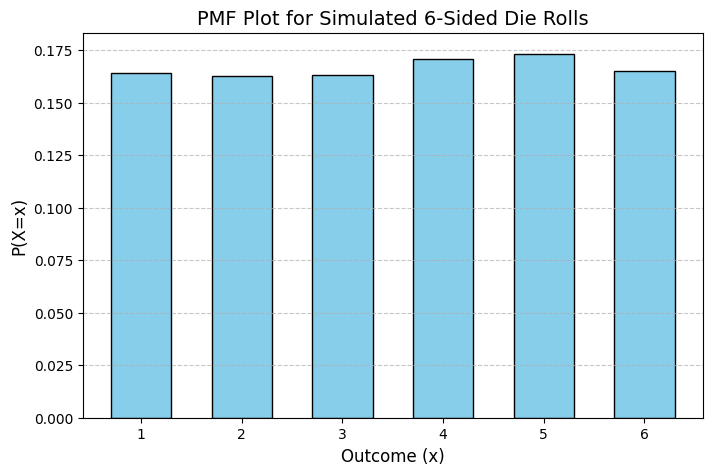

In [13]:
outcomes = range(1, 7)
probabilities = [count / sum(results_to_plot) for count in results_to_plot]
plt.figure(figsize=(8, 5))
plt.bar(outcomes, probabilities, color='skyblue', edgecolor='black', width=0.6)
plt.xlabel("Outcome (x)", fontsize=12)
plt.ylabel("P(X=x)", fontsize=12)
plt.title("PMF Plot for Simulated 6-Sided Die Rolls", fontsize=14)
plt.xticks(outcomes)
plt.ylim(0, max(probabilities) + 0.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

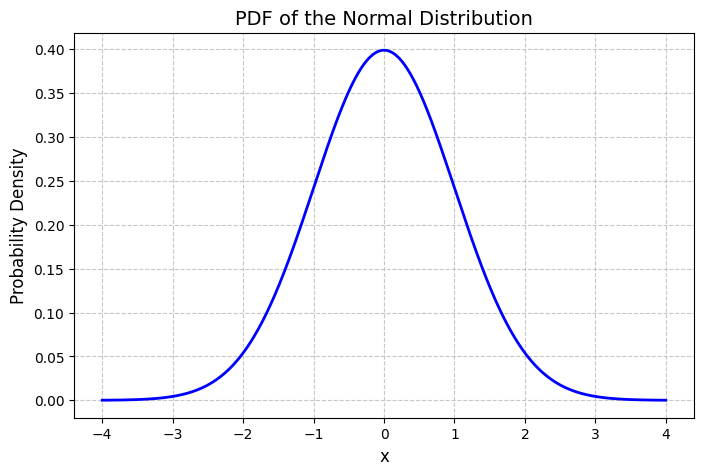

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0
std_dev = 1
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = norm.pdf(x, mean, std_dev)


plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color='blue', lw=2)
plt.title("PDF of the Normal Distribution", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Task 1: Create two random variables X and Y
np.random.seed(42)  # For reproducibility
num_samples = 1000
X = np.random.uniform(0, 1, num_samples)
noise = np.random.normal(0, 0.2, num_samples)
Y = 2 * X + noise

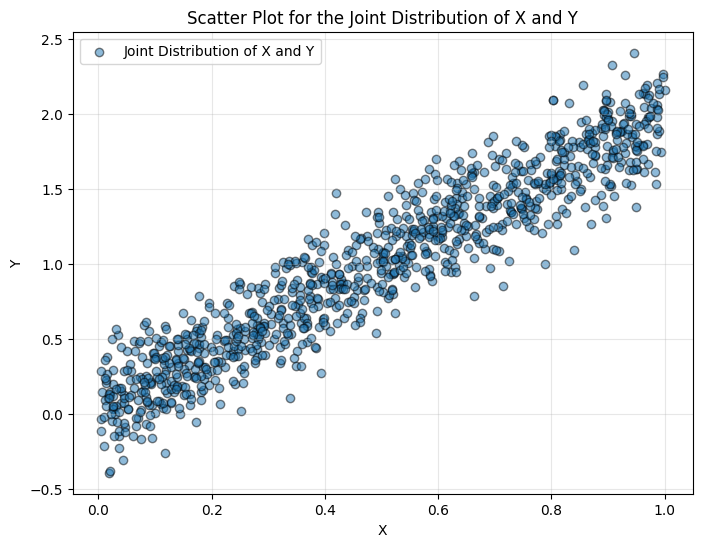

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, edgecolor='k', label='Joint Distribution of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot for the Joint Distribution of X and Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

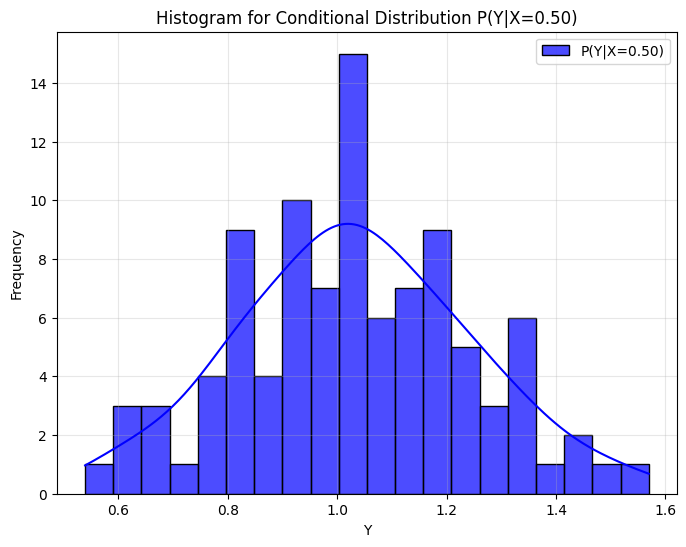

In [26]:
x_fixed = 0.5

condition = np.abs(X - x_fixed) < 0.05
conditional_Y = Y[condition]

plt.figure(figsize=(8, 6))
sns.histplot(conditional_Y, kde=True, bins=20, color='blue', alpha=0.7, label=f'P(Y|X={x_fixed:.2f})')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title(f'Histogram for Conditional Distribution P(Y|X={x_fixed:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)  # For reproducibility
n = 1000  # Number of data points
X = np.random.uniform(0, 1, n)
Y = np.random.uniform(0, 1, n)

In [28]:
correlation_independent, _ = pearsonr(X, Y)
print(f"Pearson correlation coefficient (independent variables): {correlation_independent:.4f}")

noise = np.random.normal(0, 0.5, n)  # Adding Gaussian noise
Y_dependent = 3 * X + noise

Pearson correlation coefficient (independent variables): 0.0293


Pearson correlation coefficient (dependent variables): 0.8721


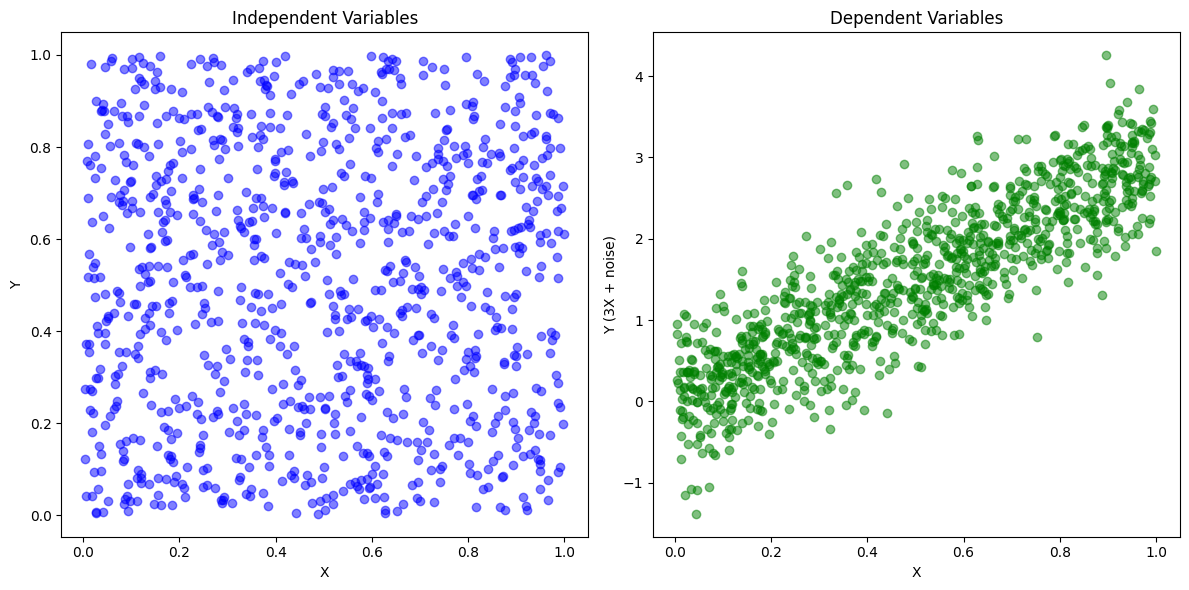

In [32]:
correlation_dependent, _ = pearsonr(X, Y_dependent)
print(f"Pearson correlation coefficient (dependent variables): {correlation_dependent:.4f}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.5, color='blue')
plt.title("Independent Variables")
plt.xlabel("X")
plt.ylabel("Y")


plt.subplot(1, 2, 2)
plt.scatter(X, Y_dependent, alpha=0.5, color='green')
plt.title("Dependent Variables")
plt.xlabel("X")
plt.ylabel("Y (3X + noise)")

plt.tight_layout()
plt.show()